<a href="https://colab.research.google.com/github/ppts2545/Titanic/blob/main/notebooks/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train.csv')
pd.DataFrame(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [ ]:
df['Cabin'] = df['Cabin'].fillna('Unknown')

In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df[df['Age'] == df['Age'].min()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,Unknown,C


In [ ]:
min_age_died = df[df['Survived'] == 0]['Age'].min()
print("Minimum age of passengers who did not survive:", min_age_died)

Minimum age of passengers who did not survive: 1.0


In [ ]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


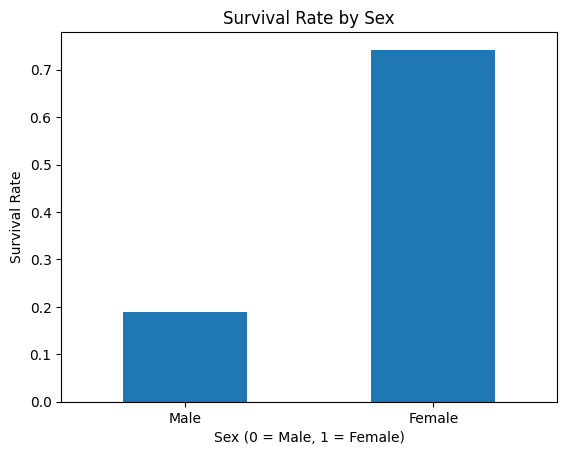

In [ ]:
survived_by_sex = df.groupby('Sex')['Survived'].mean()

survived_by_sex.plot(kind='bar')
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.xlabel('Sex (0 = Male, 1 = Female)')
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)
plt.show()

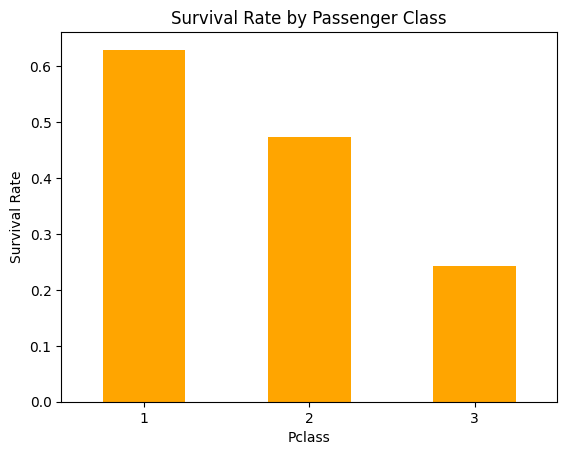

In [ ]:
survived_by_pclass = df.groupby('Pclass')['Survived'].mean()

survived_by_pclass.plot(kind='bar', color='orange')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Pclass')
plt.xticks(rotation=0)
plt.show()

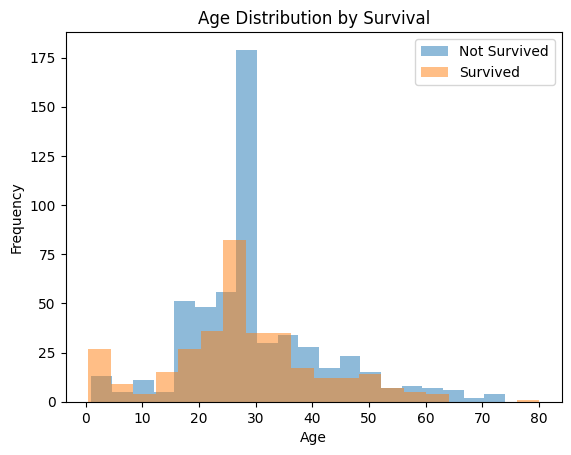

In [ ]:
df[df['Survived'] == 0]['Age'].plot(kind='hist', alpha=0.5, label='Not Survived', bins=20)
df[df['Survived'] == 1]['Age'].plot(kind='hist', alpha=0.5, label='Survived', bins=20)
plt.legend()
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.show()

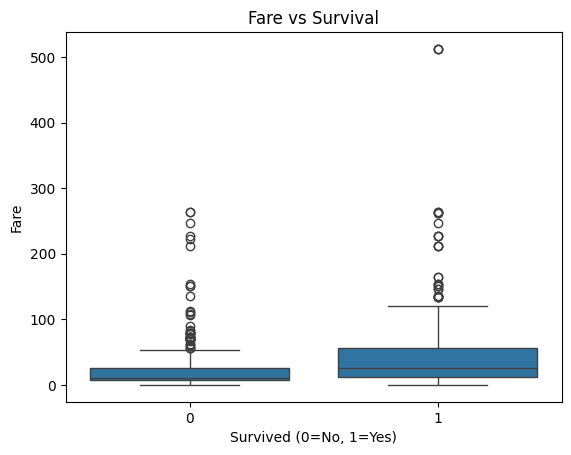

In [ ]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare vs Survival')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.show()

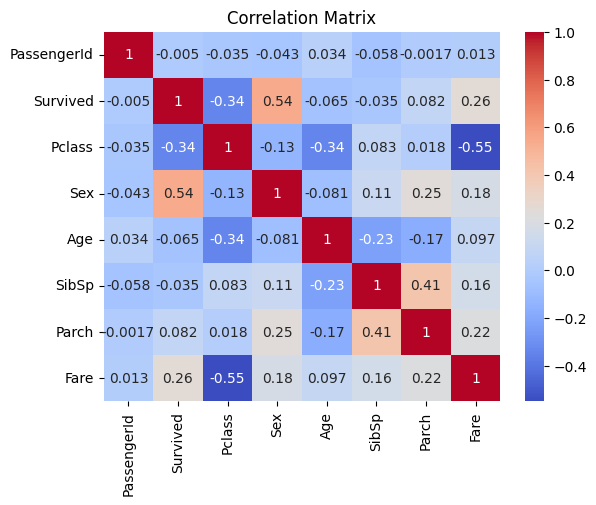

In [ ]:
numeric_df = df.select_dtypes(include=['number'])

corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3629 (\N{THAI CHARACTER O ANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3604 (\N{THAI CHARACTER DO DEK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3594 (\N{THAI CHARACTER CHO CHANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3637 (\N{THAI CHARACTER SARA II}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **k

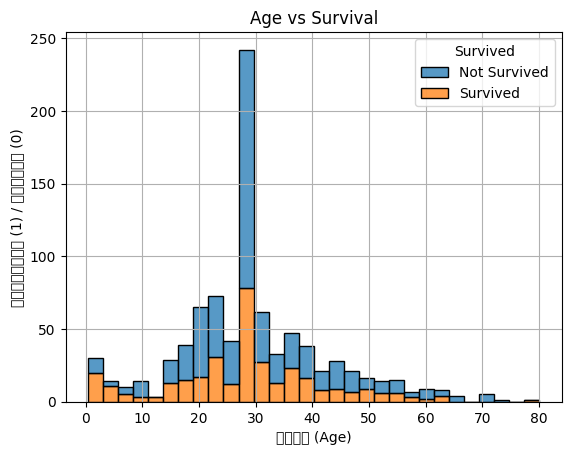

In [ ]:
df['Survived'] = df['Survived'].map({0: 'Not Survived', 1: 'Survived'})
sns.histplot(data=df, x='Age', hue='Survived', bins=30, multiple='stack')
plt.title('Age vs Survival')
plt.xlabel("อายุ (Age)")
plt.ylabel("รอดชีวิต (1) / ไม่รอด (0)")
plt.grid(True)  # ตั้งชื่อแกน y
plt.show()

In [ ]:
print(not_survived['Age'].isnull().sum())

0


In [ ]:
# กรองเฉพาะคนที่ไม่รอดและมีข้อมูลอายุ
not_survived = df[(df['Survived'] == 'Not Survived') & (df['Age'].notnull())]

# เพิ่มช่วงอายุให้ครอบคลุมมากขึ้น
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 100]
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']

# สร้าง AgeGroup ใหม่
not_survived['AgeGroup'] = pd.cut(not_survived['Age'], bins=age_bins, labels=age_labels)

# สร้างตารางแจกแจงความถี่
frequency_table = not_survived['AgeGroup'].value_counts().sort_index()

# แสดงผล
print(frequency_table)

AgeGroup
0-9       26
10-19     71
20-29    271
30-39     86
40-49     53
50-59     25
60-69     13
70-79      4
80+        0
Name: count, dtype: int64


<ipython-input-80-2109e178de52>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_survived['AgeGroup'] = pd.cut(not_survived['Age'], bins=age_bins, labels=age_labels)
